# The H-R diagram
This notebook will explore the HR diagram, perhaps the most important figure in astronomy, and a classic example of the power of data visualization.

When we look at the Sky, some stars are bright and some faint. This is due not only to their intrinsic properties. but also to their distance from us. If we want to study the intrinsic properties of stars we need to have first determined their distances.

In [1]:
from astropy.io import ascii
from astropy.table import Table
from astropy import units as u

We'll be using a catalog of stars known as the [HGY database](http://www.astronexus.com/hyg). It is the combination of three surveys which have meadured distances. In the file I've provided in this repository I've filtered that catalog to only include columns we need and to also remove entries without measured distances and colors.

In [2]:
starTable = ascii.read('HGY_dist.dat')
starTable

proper,ra,dec,dist,mag,absmag,spect,ci
str20,float64,float64,float64,float64,float64,str12,float64
Sol,0.0,0.0,0.0,-26.7,4.85,G2V,0.656
--,6e-05,1.089009,219.7802,9.1,2.39,F5,0.482
--,0.000283,-19.49884,47.9616,9.27,5.866,K3V,0.999
--,0.000335,38.859279,442.4779,6.61,-1.619,B9,-0.019
--,0.000569,-51.893546,134.2282,8.06,2.421,F0V,0.37
--,0.000665,-40.591202,257.732,8.55,1.494,G8III,0.902
--,0.001246,3.946458,55.0358,12.31,8.607,M0V:,1.336
--,0.00147,20.036114,57.8704,9.64,5.828,G0,0.74
--,0.001823,25.886461,200.8032,9.05,2.536,M6e-M8.5e Tc,1.102


In [3]:
# plotting imports
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn
import numpy as np
from astropy.coordinates import Angle

In [2]:
import seaborn


ImportError: DLL load failed: The specified module could not be found.

## Plotting the Skymap
Let's see where those stars are on the sky

C:\Users\msubbarao\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\projections\geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


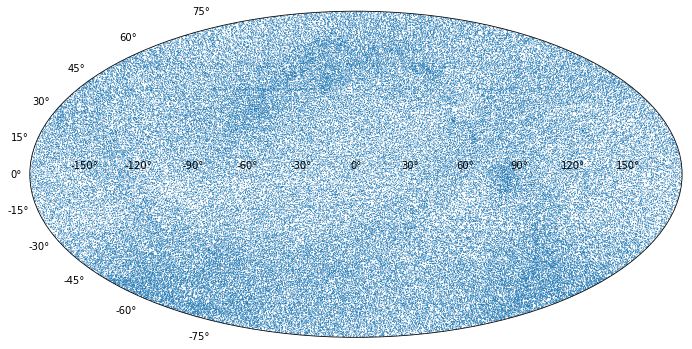

In [4]:
#seaborn.set_style(("darkgrid"))
fig = plt.figure (figsize=(13,6))
ax = fig.add_subplot(111,projection="mollweide")
plt.scatter(Angle(starTable[1:]['ra'],u.hr).wrap_at(180.*u.deg).radian,Angle(starTable[1:]['dec'],u.deg).radian,s=1,edgecolors='none')

OK, well se can see our Galaxy in that plot, but not much else. Let's do another map, this time only showing stars brighter than 4th magnitude, and also scaling the stars bytheir brightness.

C:\Users\msubbarao\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\msubbarao\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\projections\geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


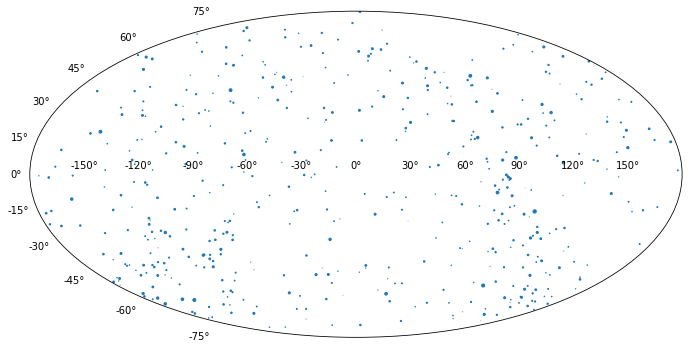

In [5]:
fig = plt.figure (figsize=(13,6))
ax = fig.add_subplot(111,projection="mollweide")
plt.scatter(Angle(starTable[1:]['ra'],u.hr).wrap_at(180.*u.deg).radian,Angle(starTable[1:]['dec'],u.deg).radian,s=(2.0*(4.0-starTable[1:]['mag'])))

### Variable distributions
To start let's see how the quantities we'll be working with are distributed.

Text(0.5,0,'B-V')

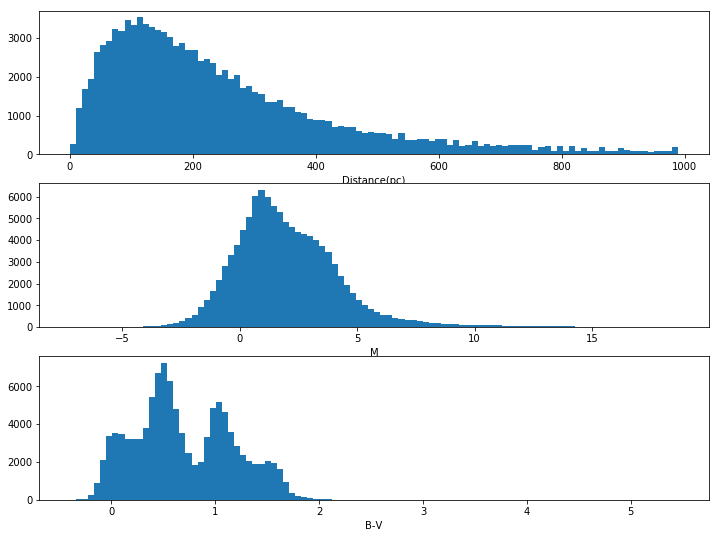

In [18]:
fig = plt.figure (figsize=(12,9))
ax = fig.add_subplot(311)
ax.hist(starTable['dist'],bins=100)
ax.set_xlabel("Distance(pc)")
a2 = fig.add_subplot(312)
a2.hist(starTable['absmag'],bins=100)
a2.set_xlabel("M")
a3 = fig.add_subplot(313)
a3.hist(starTable['ci'],bins=100)
a3.set_xlabel("B-V")

## The HR Diagram
Simply plotting Color vs Absolute Magniture gives us the HR Diagram

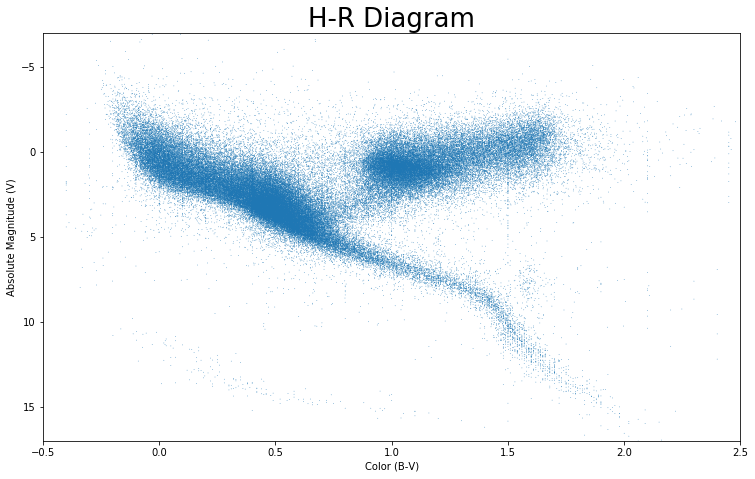

In [17]:
#seaborn.set_style(("darkgrid"))
fig = plt.figure (figsize=(12.5, 7.5))
plt.gca().invert_yaxis()
plt.xlim(-0.5,2.5)
plt.ylim(17,-7)
plt.title('H-R Diagram',fontsize=26)
plt.ylabel('Absolute Magnitude (V)')
plt.xlabel('Color (B-V)')
plt.scatter(starTable['ci'] ,starTable['absmag'],s=.5,edgecolors='none')

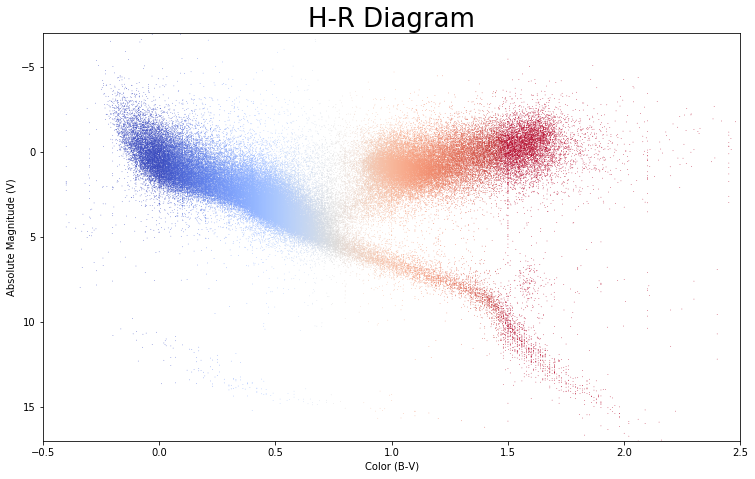

In [22]:
#seaborn.set_style(("darkgrid"), {"axes.facecolor": ".2"})
fig = plt.figure (figsize=(12.5, 7.5))
plt.gca().invert_yaxis()
plt.xlim(-0.5,2.5)
plt.ylim(17,-7)
plt.title('H-R Diagram',fontsize=26)
plt.ylabel('Absolute Magnitude (V)')
plt.xlabel('Color (B-V)')
plt.scatter(starTable['ci'] ,starTable['absmag'],s=.5,cmap='coolwarm',c=starTable['ci'],edgecolors='none',vmin=0.0,vmax=1.5)

## HR Diagram and Stellar Evolution
The grouping in the HR diagram led to the recogntion that the different regions in the diagram cooresponeded to an evolutionary sequence. We now have detailed models for how a star of a given mass evolves over its lifetime. [Here](http://www.epantaleo.com/wp-content/uploads/2015/10/HR_diagram_d3.html) is a visualization of the evolution of a 100 star cluster over 5 billions years. This was produced by Ester Panatelo, Aaron Geller and myself based on simulations run by Aaron Geller using the NBODY6 code which includes both gravitational interactions and steller evolution.

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("qJMom80Qdc8")

## Color Magnitude Diagram of a Globular Clusters
The color magnitude diagram is very similar to the HR diagram, except it is plotted using apparent rather than absolute magnitudes. If we were to construct this for a random sample of stars it would be a mess, however a cluster of stars are approximately at the same distance, so there is just a constant shift from the HR diagram based on the distance to the cluster.

##### We can conect to Worldwide Telescope to see the imagery of the cluster we are working with, Palomar 5

In [24]:
from pywwt.windows import WWTWindowsClient
my_wwt = WWTWindowsClient()

Connecting to WWT on host 127.0.0.1.


In [25]:
# Tell WWT to Fly to the position of the cluster
my_wwt.change_mode('Sky',fly_to=[-0.1082,229.0128/15,1,0.,0.])

The catalog pal5.csv was created by soing a radial search for objects in the Sloan Digital Sky Survey [SDSS](http://sdss.org) for all abjects within three arcminuted of the center of the cluster.

In [26]:
pal5 = ascii.read('pal5.csv')
pal5

objID,run,rerun,camcol,field,obj,type,ra,dec,u,g,r,i,z,Err_u,Err_g,Err_r,Err_i,Err_z
str18,int32,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
582093500493070640,756,20,3,756,304,6,229.013558,-0.10863,21.941,20.797,20.461,20.314,20.302,0.147,0.026,0.027,0.036,0.129
582093500493073198,756,20,3,756,2862,6,229.012259,-0.106399,22.786,21.45,21.202,21.027,21.168,0.285,0.04,0.048,0.063,0.256
582093500493070627,756,20,3,756,291,6,229.01242,-0.110108,21.085,19.881,19.298,19.058,18.998,0.078,0.014,0.012,0.015,0.046
582093500493070629,756,20,3,756,293,3,229.009014,-0.108526,21.638,19.94,19.371,19.238,19.494,0.139,0.016,0.014,0.019,0.082
582093500493072166,756,20,3,756,1830,6,229.012177,-0.103744,23.052,21.844,21.467,21.29,21.483,0.365,0.057,0.062,0.083,0.346
582093500493072168,756,20,3,756,1832,6,229.011457,-0.104468,23.384,22.161,21.802,21.645,20.202,0.466,0.073,0.082,0.112,0.12
582093500493070625,756,20,3,756,289,6,229.02003,-0.107681,19.862,18.4,17.759,17.458,17.352,0.032,0.006317,0.005201,0.005527,0.014
582093500493070639,756,20,3,756,303,3,229.015112,-0.112887,21.455,20.434,20.074,19.891,20.022,0.123,0.024,0.025,0.033,0.134
582093500493070644,756,20,3,756,308,3,229.005616,-0.108593,19.366,17.691,17.491,17.29,16.668,0.204,0.03,0.03,0.03,0.073


Oops that contains everything SDSS identified in the direction of the cluster, we only want stars (not galaxies). We just keep things with type=6 (6 means star in this catalog, 3 galaxy).

In [27]:
mask = pal5['type']==6
pal5_stars = pal5[mask]
pal5_stars

objID,run,rerun,camcol,field,obj,type,ra,dec,u,g,r,i,z,Err_u,Err_g,Err_r,Err_i,Err_z
str18,int32,int32,int32,int32,int32,int32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
582093500493070640,756,20,3,756,304,6,229.013558,-0.10863,21.941,20.797,20.461,20.314,20.302,0.147,0.026,0.027,0.036,0.129
582093500493073198,756,20,3,756,2862,6,229.012259,-0.106399,22.786,21.45,21.202,21.027,21.168,0.285,0.04,0.048,0.063,0.256
582093500493070627,756,20,3,756,291,6,229.01242,-0.110108,21.085,19.881,19.298,19.058,18.998,0.078,0.014,0.012,0.015,0.046
582093500493072166,756,20,3,756,1830,6,229.012177,-0.103744,23.052,21.844,21.467,21.29,21.483,0.365,0.057,0.062,0.083,0.346
582093500493072168,756,20,3,756,1832,6,229.011457,-0.104468,23.384,22.161,21.802,21.645,20.202,0.466,0.073,0.082,0.112,0.12
582093500493070625,756,20,3,756,289,6,229.02003,-0.107681,19.862,18.4,17.759,17.458,17.352,0.032,0.006317,0.005201,0.005527,0.014
582093500493072162,756,20,3,756,1826,6,229.014142,-0.103704,25.618,21.496,19.971,18.755,18.155,0.542,0.044,0.019,0.012,0.023
582093500493072164,756,20,3,756,1828,6,229.013109,-0.10205,22.536,21.378,21.059,20.835,20.925,0.238,0.039,0.043,0.055,0.216
582093500493072165,756,20,3,756,1829,6,229.013107,-0.100928,22.448,21.628,21.247,21.264,21.005,0.222,0.047,0.051,0.08,0.231


##### OK, now lets's see the catalog in WWT

In [28]:
#Set up WWT layer
new_layer = my_wwt.new_layer("Sky", "Palomar 5", pal5_stars.colnames)
#Set visualization parameters in WWT
props_dict = {"CoordinatesType":"Spherical",\
              "MarkerScale":"Screen",\
              "PlotType":"Circle",\
              "PointScaleType":"Constant",\
              "ScaleFactor":"16",\
              "RaUnits":"Degrees",\
              "TimeSeries":"False"}
new_layer.set_properties(props_dict)
#Send data to WWT client
new_layer.update(data=pal5_stars, purge_all=True, no_purge=False, show=True)


##### And now let's plot the color-magnitude diagram

In [ ]:
seaborn.set_style(("darkgrid"))
fig = plt.figure (figsize=(7.5, 5))
plt.gca().invert_yaxis()
plt.xlim(-0.5,2.0)
plt.ylim(25,16)
plt.title('Color-Magnitude Diagram for Pal5',fontsize=26)
plt.ylabel('Apparent Magnitude (g)')
plt.xlabel('color (g-r)')
plt.scatter(pal5_stars['g']-pal5_stars['r'] ,pal5_stars['g'],s=2,cmap='coolwarm',edgecolors='none',vmin=0.0,vmax=1.0)

## Things for you to try:
Now we can figure out a lot of things with HR color-magnitude diagrams. I'll get you started with the following exercises, but you'll have to do most of the work yourself.

#### Finding the Distance to Pal 5
The color Magnitude Diagram uses apparent magnitudes instead of  absolute magnitudes. The difference between the apparent and absolute magnitude is known as the distance modulus = (m - M). Extimate the distance modulus from the shift in the two diagrams to esitmate the distance to Pal 5. Now things are a little complicared by the fact that we are using different magnitude systems (B and V vs. SDSS g andr). However the shifts between the two systems and can be ignored for this rough estimate.

In [ ]:
# This is the code for converting the distance Modulus to a distance 
from astropy.coordinates import Distance
Distance(distmod=10.0)

#### Which is older pal 5 or pal 3
Construct the color-magnitude of Pal 3 (RA = 151.3801 deg, dec= 0.072 deg). By comparing the location of their main sequence turnoffs, can you figure out which cluster is older.

I've already downloaded the data for you, you can download it from the repository like this:

In [ ]:
# Load Pal 3 data
pal3objects = ascii.read('pal3.csv')
pal3objects

#### Make an HR Diagram from Gaia Data Release 1 (2 million stars!)
The [Gaia](http://sci.esa.int/gaia/) mission had recently released a sample of 2 million star distances, a number that dwarfs what we have been using. But that is nothing in April 2018 they will release a sample containing over one billion!!!

Now this will be the ultimate HR diagram. I'll provide you with the code to download the catalog to get you started. Good  luck!

In [ ]:
# We will download the catalog from the VizieR catalog service
from astroquery.vizier import Vizier
v = Vizier()
v.ROW_LIMIT = -1 # Without this there is a limit
catalogs = v.get_catalogs('I/337/tgas')
GaiaStars=catlogs[0]